In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
#导入高校数据
university = pd.read_excel(r'F:\项目\数据分析与机器学习\资料\university_all.xls')
university.head(20)

,校名,省份,城市,性质,类型,985,211,办校性质,评分
0,北京大学,北京市,北京市,本科,综合,1,1,0,4.7
1,中国人民大学,北京市,北京市,本科,综合,1,1,0,4.8
2,清华大学,北京市,北京市,本科,综合,1,1,0,4.8
3,北京交通大学,北京市,北京市,本科,工科,0,1,0,4.4
4,北京工业大学,北京市,北京市,本科,工科,0,1,0,4.4
5,北京航空航天大学,北京市,北京市,本科,工科,1,1,0,4.5
6,北京理工大学,北京市,北京市,本科,工科,1,1,0,4.5
7,北京科技大学,北京市,北京市,本科,工科,0,1,0,4.5
8,北方工业大学,北京市,北京市,本科,工科,0,0,0,4.5
9,北京化工大学,北京市,北京市,本科,工科,0,1,0,4.1


In [2]:
#导入城市数据
city = pd.read_excel('F:\项目\数据分析与机器学习\资料\cityinfo.xls')
city.head(20)

,城市,层次,GDP/亿元,人口/万
0,北京市,一线,30320.0,2171.0
1,上海市,一线,32679.0,2418.0
2,广州市,一线,23000.0,1450.0
3,深圳市,一线,24691.0,1253.0
4,成都市,一线,15342.0,1605.0
5,杭州市,一线,13500.0,949.0
6,重庆市,一线,20363.0,3372.0
7,武汉市,一线,14847.0,1112.0
8,西安市,一线,8349.0,1255.0
9,苏州市,一线,18597.0,1068.0


In [3]:
#查看高校信息和空值情况
print(university.info())
university.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 9 columns):
校名      2688 non-null object
省份      2688 non-null object
城市      2688 non-null object
性质      2688 non-null object
类型      2658 non-null object
985     2688 non-null int64
211     2688 non-null int64
办校性质    2688 non-null int64
评分      2631 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 189.1+ KB
None


校名       0
省份       0
城市       0
性质       0
类型      30
985      0
211      0
办校性质     0
评分      57
dtype: int64

In [4]:
#查看城市信息和空值情况
print(city.info())
city.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 4 columns):
城市        326 non-null object
层次        326 non-null object
GDP/亿元    97 non-null float64
人口/万      97 non-null float64
dtypes: float64(2), object(2)
memory usage: 10.3+ KB
None


城市          0
层次          0
GDP/亿元    229
人口/万      229
dtype: int64

In [5]:
#平均值去评分空值
university['评分'] = university['评分'].fillna(university['评分'].median())

In [6]:
#用综合来代替类型空值
university['类型'] = university['类型'].fillna('综合')

In [7]:
#两个表整合在一起
allinone = pd.merge(university,city)
allinone.head()

,校名,省份,城市,性质,类型,985,211,办校性质,评分,层次,GDP/亿元,人口/万
0,北京大学,北京市,北京市,本科,综合,1,1,0,4.7,一线,30320.0,2171.0
1,中国人民大学,北京市,北京市,本科,综合,1,1,0,4.8,一线,30320.0,2171.0
2,清华大学,北京市,北京市,本科,综合,1,1,0,4.8,一线,30320.0,2171.0
3,北京交通大学,北京市,北京市,本科,工科,0,1,0,4.4,一线,30320.0,2171.0
4,北京工业大学,北京市,北京市,本科,工科,0,1,0,4.4,一线,30320.0,2171.0


# 单一变量分析

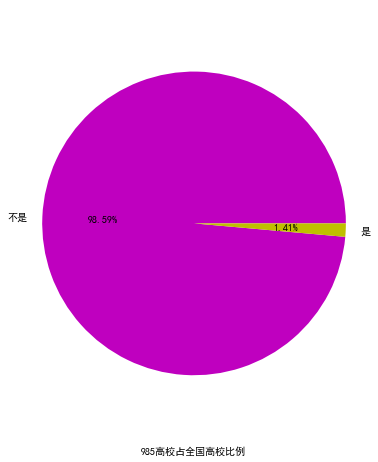

In [8]:
#985高校数量占比
a = university.groupby([985])[985].count()
x = ['不是','是']
y = a.values.tolist()
plt.figure(figsize = (6,8))
plt.pie(y,labels=x,colors = ['m','y'],autopct = '%1.2f%%')
plt.axis('equal')
plt.xlabel('985高校占全国高校比例')
plt.savefig('985高校数量占比.png')
plt.show()

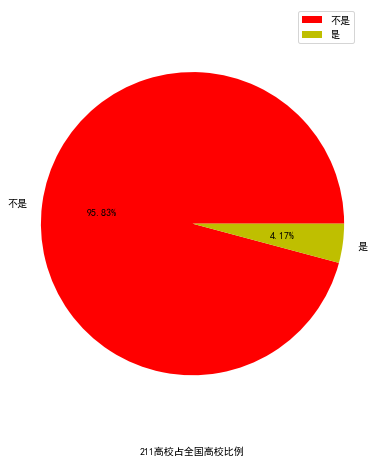

In [9]:
#211高校数量占比
a = university.groupby([211])[211].count()
x = ['不是','是']
y = a.values.tolist()
plt.figure(figsize = (6,8))
plt.pie(y,labels=x,colors=['r','y'],autopct="%1.2f%%")
plt.axis('equal')
plt.legend()
plt.xlabel('211高校占全国高校比例')
plt.savefig('211高校数量占比.png')
plt.show()

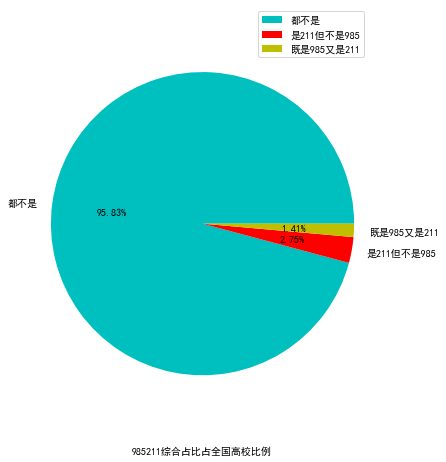

In [10]:
#985211综合占比
a = university.groupby([985,211])[211].count()
x = ['都不是','是211但不是985','既是985又是211']
y = a.values.tolist()
plt.figure(figsize = (6,8))
plt.pie(y,labels = x,colors = ['c','r','y'],autopct = '%1.2f%%')
plt.axis('equal')
plt.legend()
plt.xlabel('985211综合占比占全国高校比例')
plt.savefig('985211综合占比.png')
plt.show()

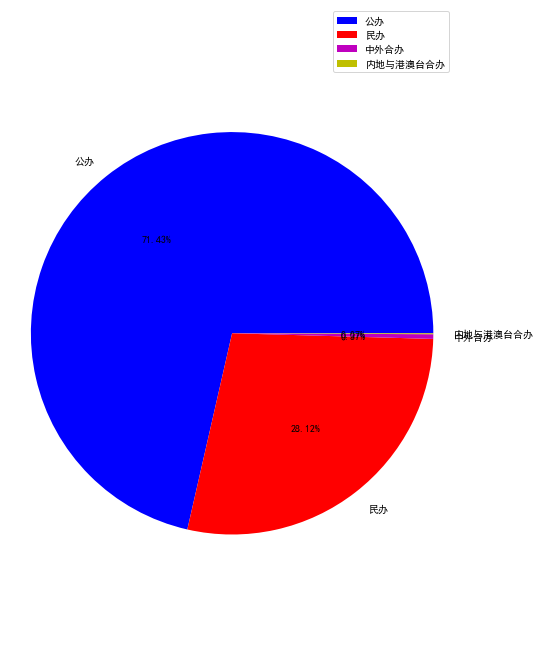

In [11]:
#办校性质分析
a = university.groupby(['办校性质'])['办校性质'].count()
x = ['公办','民办','中外合办','内地与港澳台合办']
y = a.values.tolist()
plt.figure(figsize = (8,12))
plt.pie(y,labels = x,colors = ['b','r','m','y'],autopct = '%1.2f%%')
plt.axis('equal')
plt.legend()
plt.savefig('办校性质分析.png')
plt.show()

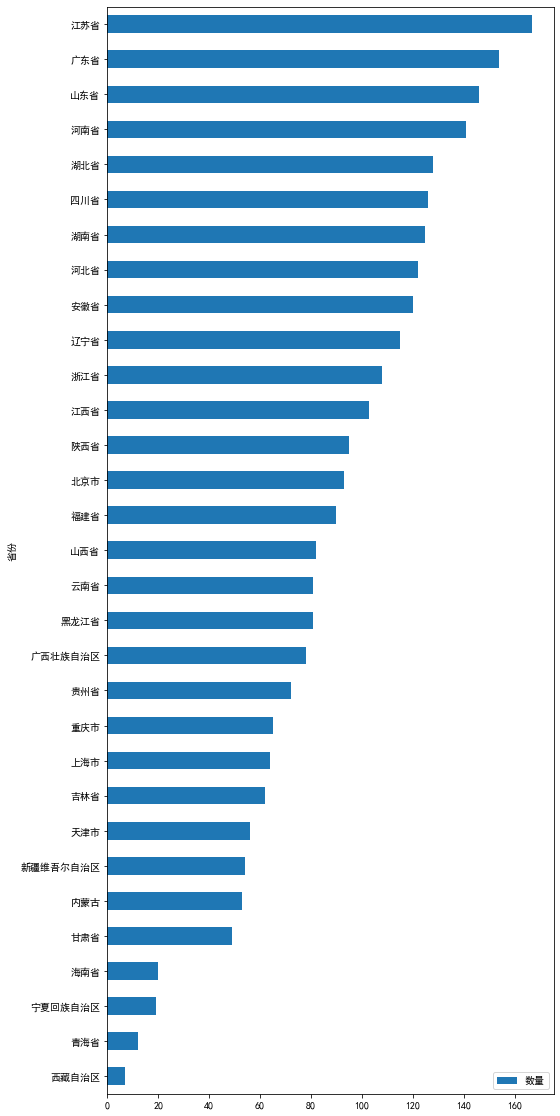

In [12]:
#各省份高校数量情况
a = university[['校名','省份']].groupby(['省份']).count().sort_values(by = ['校名'],ascending=True)
a.columns = ['数量']
a.plot(figsize = (8,20),kind = 'barh')
plt.savefig('各省份高校数量情况.png')
plt.show()

           数量
城市           
北京市        93
武汉市        83
广州市        82
重庆市        65
上海市        64
...        ..
贺州市         1
张掖市         1
西双版纳傣族自治州   1
文昌市         1
七台河市        1

[335 rows x 1 columns]


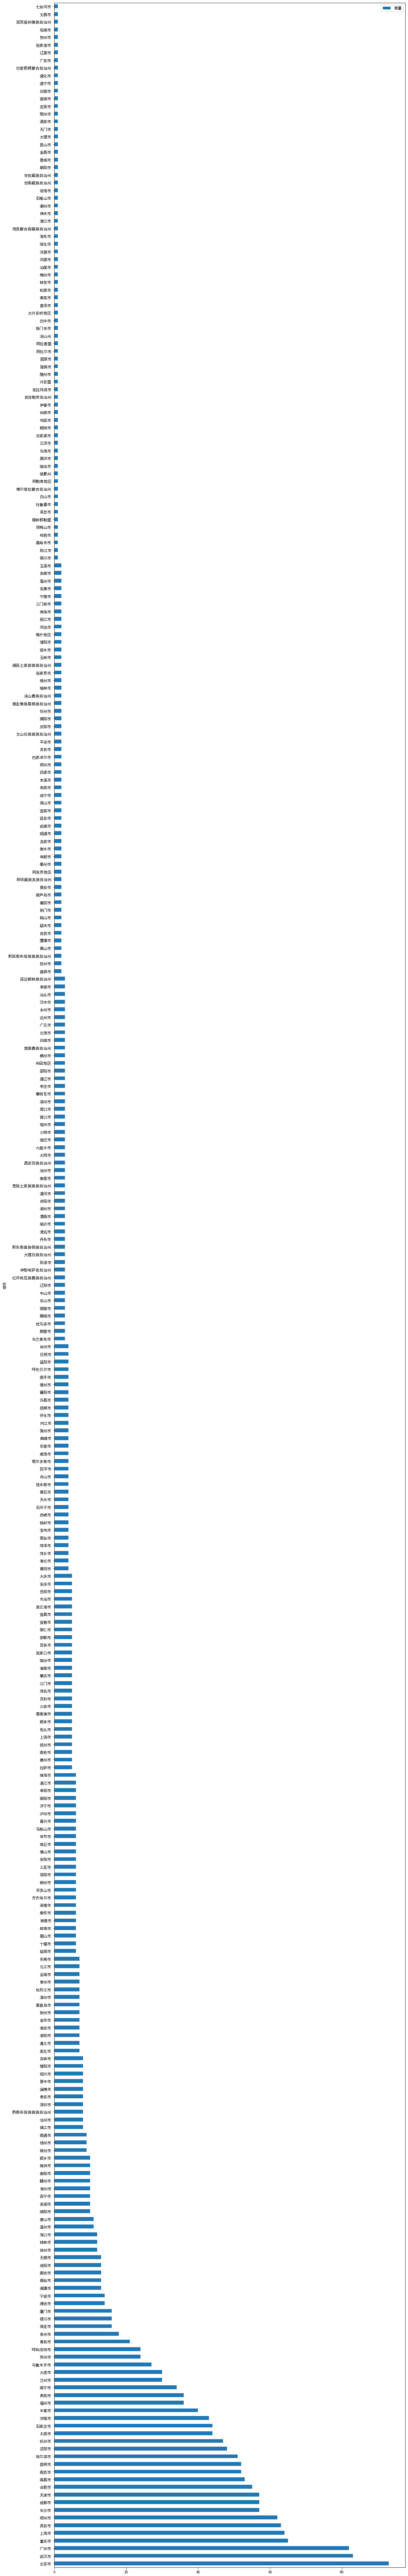

In [13]:
#城市高校数量情况
b = university[['校名','城市']].groupby(['城市']).count().sort_values(by = '校名',ascending = False)
b.columns = ['数量']
print(b)
b.plot(figsize = (16,120),kind = 'barh')
plt.savefig('城市高校数量情况.png')
plt.show()

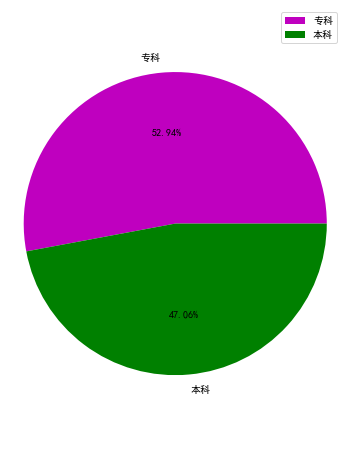

In [14]:
#本科与专科学校各占比
a = university.groupby(['性质'])['性质'].count()
x = ['专科','本科']
y = a.values.tolist()
plt.figure(figsize = (6,8))
plt.pie(y,labels = x,colors = ['m','g'],autopct = '%1.2f%%')
plt.axis('equal')
plt.legend()
plt.savefig('本科与专科学校各占比.png')
plt.show()

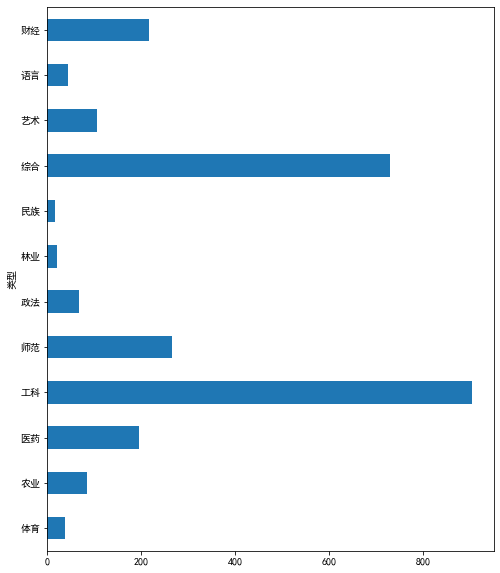

In [15]:
#各类型学校的数量情况
a = university.groupby(['类型'])['类型'].count()
a.plot(figsize = (8,10),kind = 'barh')
plt.savefig('各类型学校的数量情况.png')
plt.show()

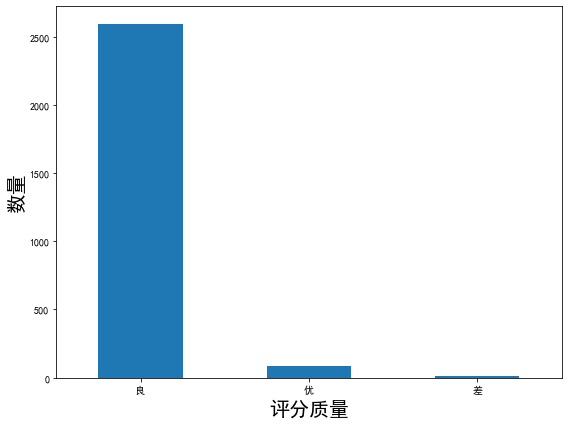

In [16]:
#评分情况
university['分布'] = pd.cut(university['评分'],bins = [0,2.0,4.5,5.0],labels = ['差','良','优'])
plt.figure(figsize = (8,6))
university['分布'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('评分质量',fontsize = 20)
plt.ylabel('数量',fontsize = 20)
plt.tight_layout()
plt.savefig('评分情况.png')
plt.show()

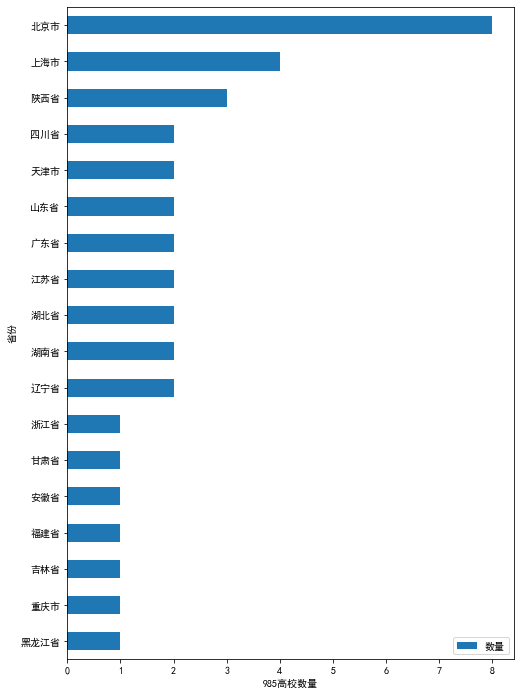

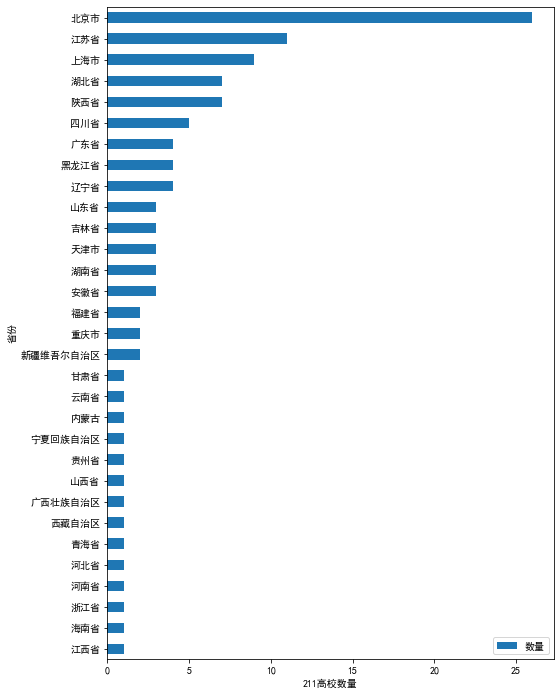

In [17]:
#各省份985、211高校的数量情况
sc985 = university[(university[985] == 1)][['省份','校名']].groupby('省份').count().sort_values(by = '校名')
sc985.columns = ['数量']
sc211 = university[(university[211] == 1)][['省份','校名']].groupby('省份').count().sort_values(by = '校名')
sc211.columns = ['数量']
sc985.plot(figsize = (8,12),kind = 'barh')
plt.xlabel('985高校数量')
sc211.plot(figsize = (8,12),kind = 'barh')
plt.xlabel('211高校数量')
plt.show()

# 多变量分析

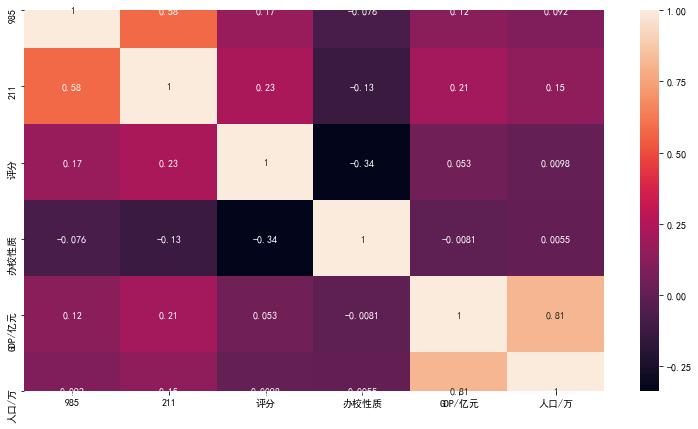

In [18]:
#相关性查看
corr = allinone[[985,211,'评分','办校性质','层次','GDP/亿元','人口/万']].corr()
fig = plt.figure(figsize = (13,7))
sns.heatmap(corr,annot=True)
plt.show()

c:\users\qsl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


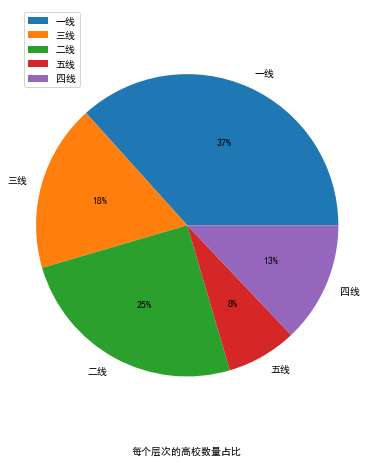

In [19]:
#每个城市层次高校数量情况
b = allinone[['校名','层次']].groupby(['层次']).count()
b.columns = ['高校数量']
x = b.index.tolist()
y = b.values.tolist()
plt.figure(figsize = (6,8))
plt.pie(y,labels = x,autopct='%.0f%%',radius=1.0)
plt.axis('equal')
plt.xlabel('每个层次的高校数量占比')
plt.legend()
plt.show()

c:\users\qsl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


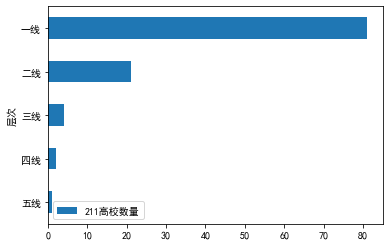

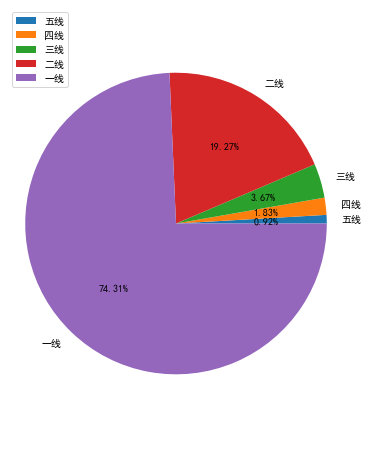

In [20]:
#211大学分布与城市层次之间的关系
a = allinone[(allinone[211]) == 1][['层次','校名']].groupby(['层次']).count().sort_values(by = '校名')
a.columns = ['211高校数量']
a.plot(kind = 'barh')
x = a.index
y = a.values
plt.figure(figsize =(6,8))
plt.pie(y,labels = x,autopct = '%0.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

c:\users\qsl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


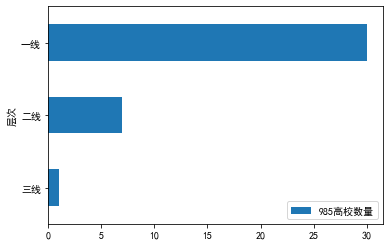

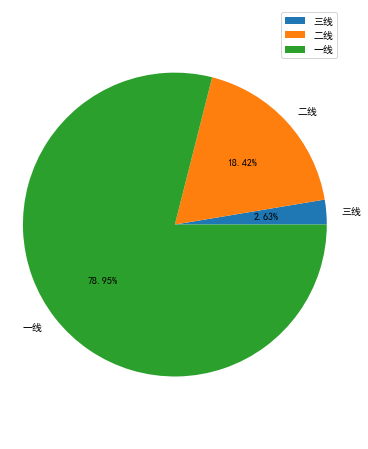

In [21]:
#985高校分布于城市层次之间的关系
a = allinone[(allinone[985]) == 1][['层次','校名']].groupby(['层次']).count().sort_values(by = '校名')
a.columns = ['985高校数量']
a.plot(kind = 'barh')
x = a.index
y = a.values
plt.figure(figsize = (6,8))
plt.pie(y,labels = x,autopct = '%0.2f%%')
plt.axis('equal')
plt.legend()
plt.show()

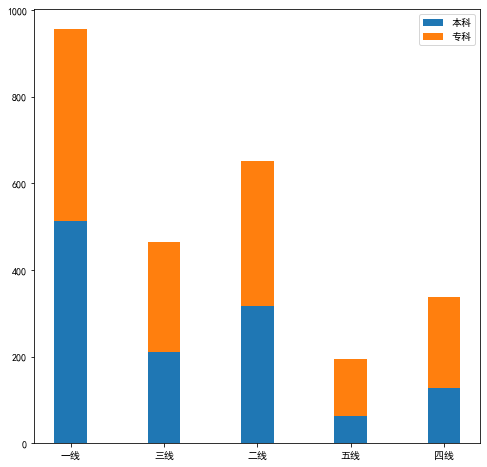

In [22]:
#各城市层次本科院校与专科院校占比柱状图
a = allinone[(allinone['性质']) == '本科'][['层次','校名']].groupby(['层次']).count()
ben = a['校名'].values.tolist()
b = allinone[(allinone['性质']) == '专科'][['层次','校名']].groupby(['层次']).count()
zhuan = b['校名'].values.tolist()
lin = a.index.tolist()
plt.figure(figsize = (8,8))
plt.bar(lin,ben,width = 0.35,label = '本科')
plt.bar(lin,zhuan,width = 0.35,bottom = ben,label = '专科')
plt.legend()
plt.show()

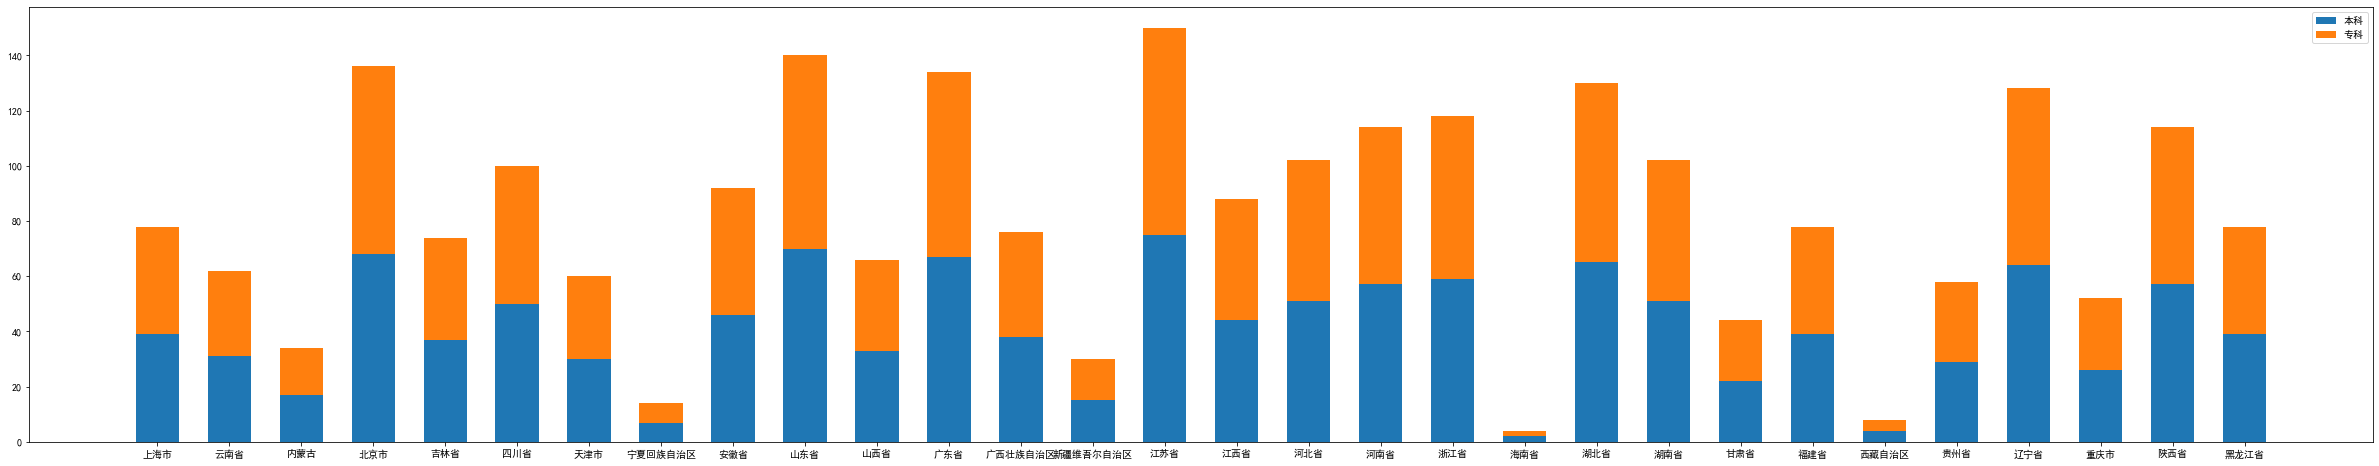

In [23]:
#各省份本科院校与专科院校占比柱状图
a = allinone[(allinone['性质']) == '本科'][['省份','校名']].groupby(['省份']).count()
ben = a['校名'].values.tolist()
b = allinone[(allinone['性质']) == '专科'][['省份','校名']].groupby(['省份']).count()
zhuan = a['校名'].values.tolist()
lin = a.index.tolist()
bv = b.index.tolist()
plt.figure(figsize = (42,8))
plt.bar(lin,ben,width = 0.6,label = '本科')
plt.bar(lin,zhuan,width = 0.6,bottom = ben,label = '专科')
plt.legend()
plt.savefig('各省份本科院校与专科院校占比柱状图.png')
plt.show()

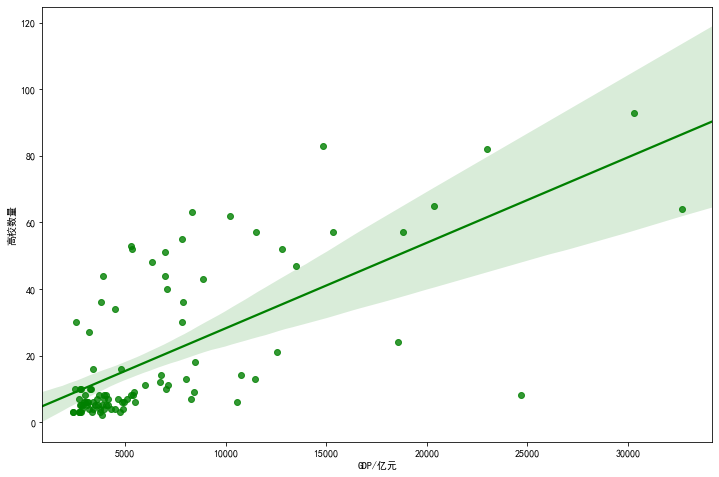

In [24]:
#GDP与高校数量之间的回归关系模型
a = university['城市'].value_counts()
b = pd.DataFrame({'城市':a.index,'高校数量':a.tolist()})
c = pd.merge(b,city)
fig = plt.figure(figsize = (12,8))
sns.regplot(x='GDP/亿元',y='高校数量',data=c,color='g')
plt.savefig('GDP与高校数量之间的回归关系模型.png')
plt.show()

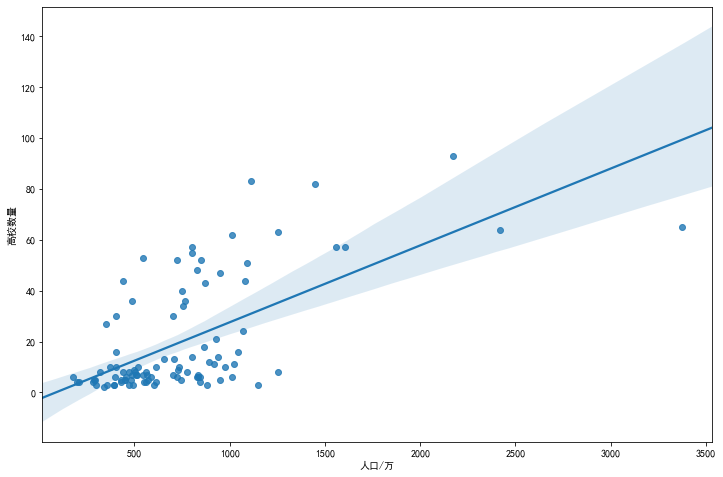

In [25]:
#人口与高校数量之间的回归关系模型
fig = plt.figure(figsize = (12,8))
sns.regplot(x='人口/万',y='高校数量',data=c)
plt.savefig('人口与高校数量之间的回归关系模型.png')
plt.show()

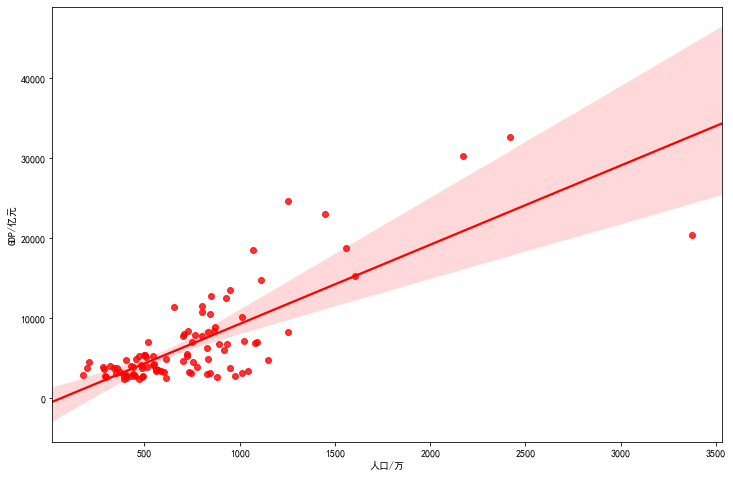

In [26]:
#城市人口与城市GDP之间的回归关系模型
fig = plt.figure(figsize = (12,8))
sns.regplot(x = '人口/万',y = 'GDP/亿元',data = c,color = 'r')
plt.show()

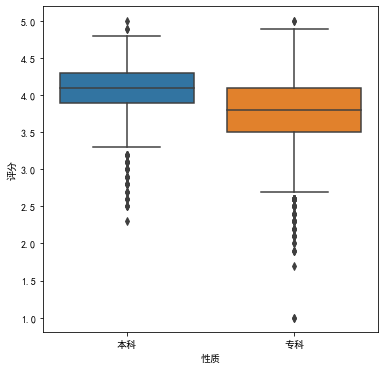

In [27]:
#学校性质和评分之间的关系
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = '性质',y = '评分',data = allinone)
plt.show()

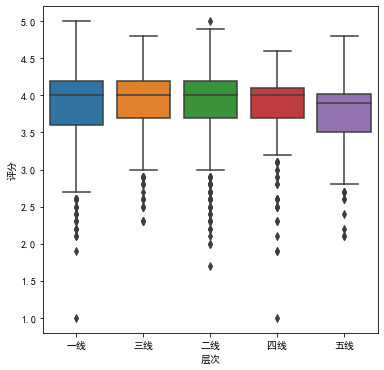

In [28]:
#城市层次和学校评分的关系
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = '层次',y = '评分',data = allinone)
plt.show()

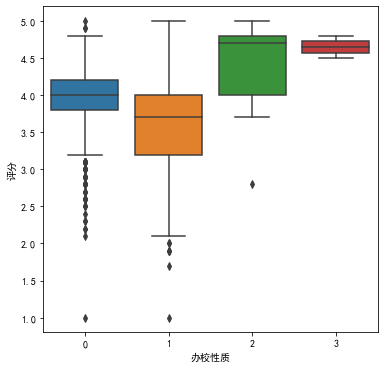

In [29]:
#办校性质和学校评分的关系
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = '办校性质',y = '评分',data = allinone)
plt.show()

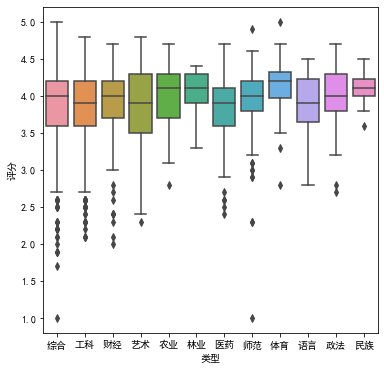

In [30]:
#学校类型和学校评分的关系
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = '类型',y = '评分',data = allinone)
plt.savefig('学校类型和学校评分的关系.png')
plt.show()

类型  省份  
体育  上海市     2
    云南省     1
    内蒙古     1
    北京市     3
    吉林省     1
           ..
财经  贵州省     5
    辽宁省     8
    重庆市     5
    陕西省     9
    黑龙江省    5
Name: 类型, Length: 299, dtype: int64


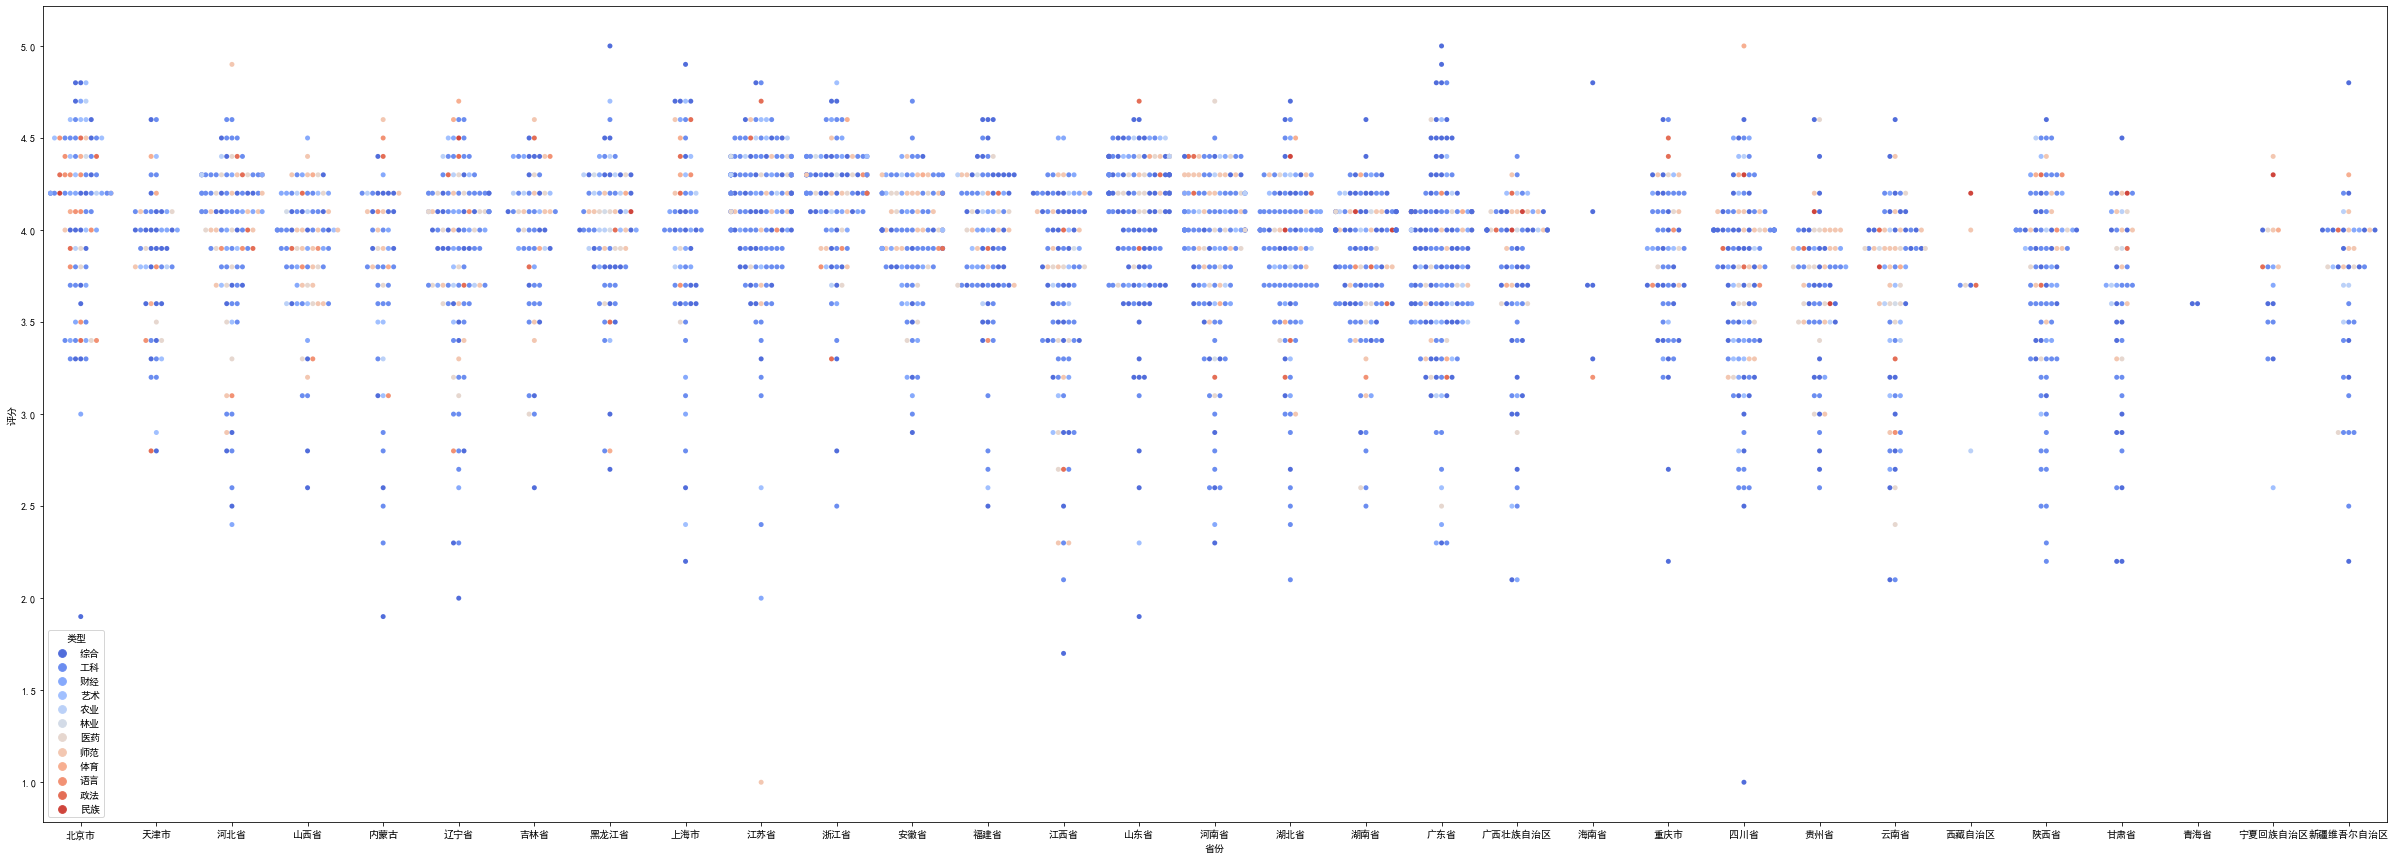

In [31]:
#学校类型和学校所在省份与评分之间的关系
a = allinone.groupby(['类型','省份'])['类型'].count()#看看每个省的各种类型学校有多少
print(a)
fig = plt.figure(figsize = (42,15))
sns.swarmplot(x = '省份',y = '评分',hue = '类型',data = allinone,palette = 'coolwarm')
plt.show()

性质  省份  
专科  上海市     25
    云南省     47
    内蒙古     36
    北京市     25
    吉林省     25
            ..
本科  贵州省     29
    辽宁省     64
    重庆市     26
    陕西省     57
    黑龙江省    39
Name: 性质, Length: 61, dtype: int64


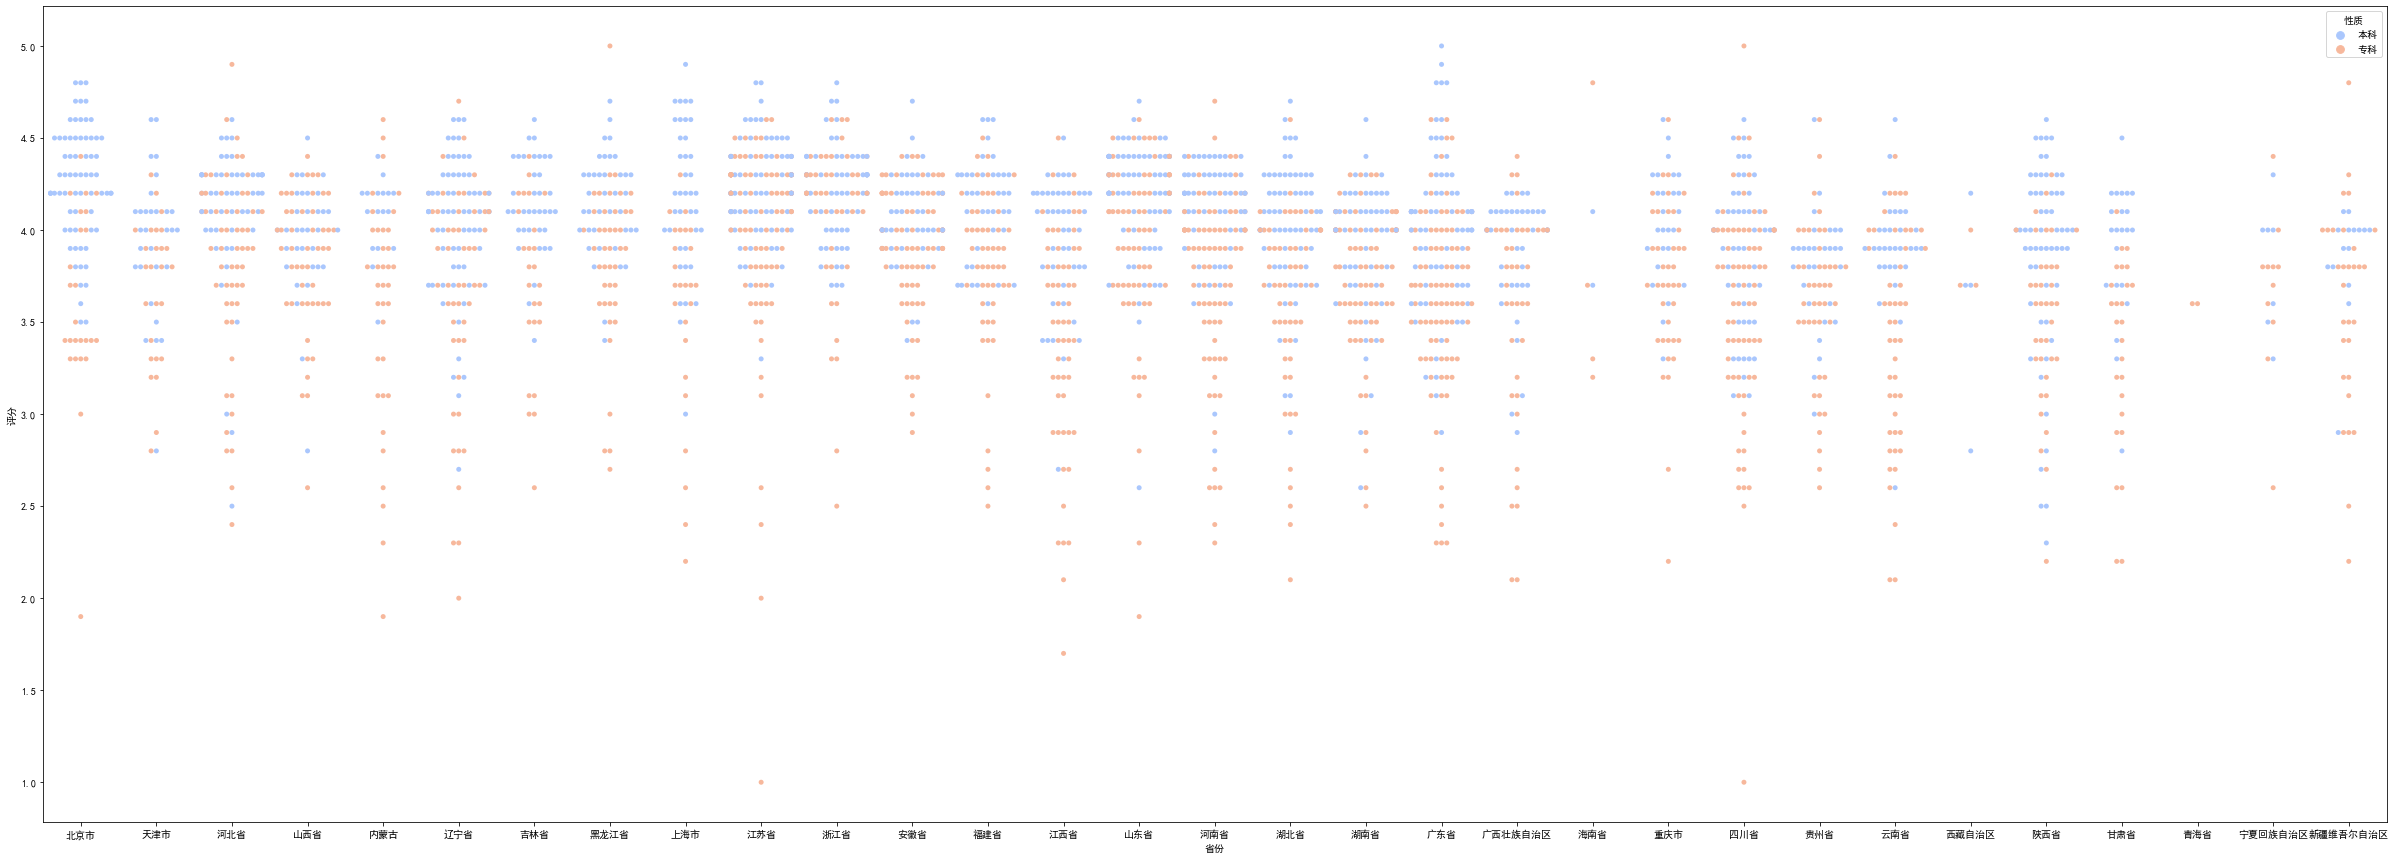

In [32]:
#学校性质和学校所在省份与评分之间的关系
a = allinone.groupby(['性质','省份'])['性质'].count()#看看每个省的各种性质学校有多少
print(a)
fig = plt.figure(figsize = (42,15))
sns.swarmplot(x = '省份',y = '评分',hue = '性质',data = allinone,palette = 'coolwarm')
plt.savefig('学校性质和学校所在省份与评分之间的关系.png')
plt.show()

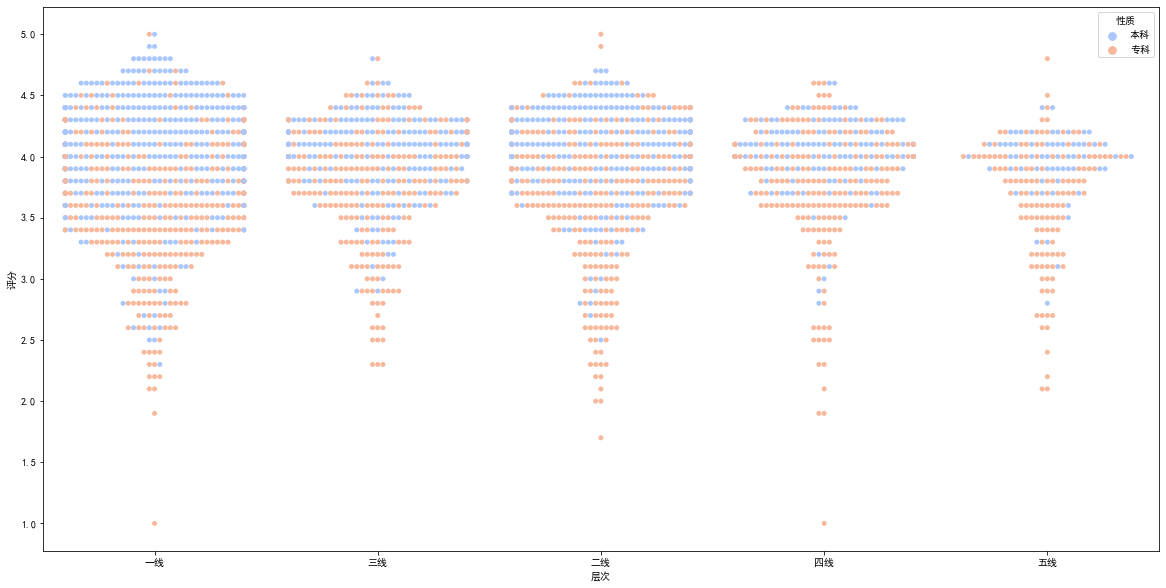

In [33]:
#学校性质和学校所在城市层次与评分之间的关系
fig = plt.figure(figsize = (20,10))
sns.swarmplot(x = '层次',y = '评分',hue = '性质',data = allinone,palette = 'coolwarm')
plt.show()

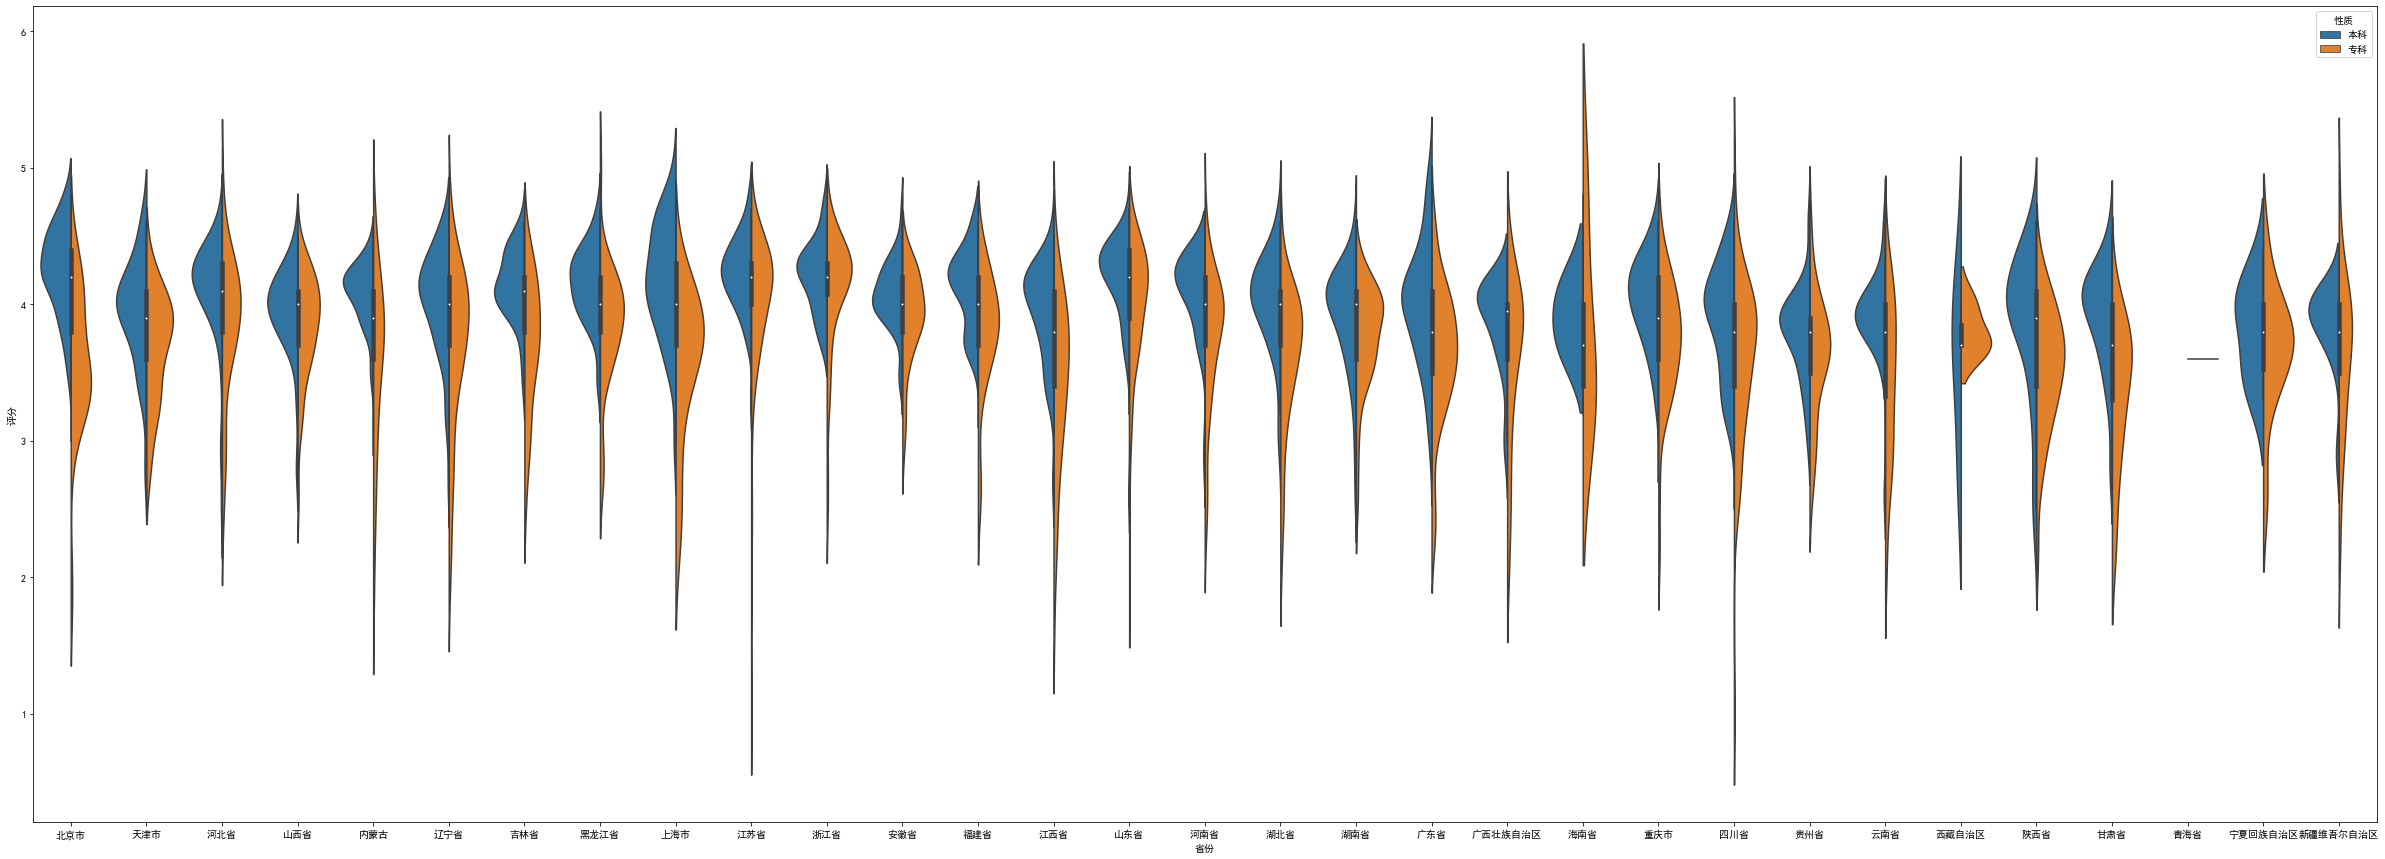

In [34]:
#学校性质和学校所在省份与评分之间的关系
fig = plt.figure(figsize = (42,15))
sns.violinplot(x = '省份',y = '评分',hue = '性质',data = allinone,split = True)
plt.savefig('学校性质和学校所在省份与评分之间的关系.png')
plt.show()